In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('vgsales.csv')

In [2]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
##checking for missing values
print(df.isnull().sum())

In [4]:
##dropping null values 
df.dropna(inplace=True)

##dropping columns that are not relevant to predicting global sales
df.drop(columns=['Rank', 'Name'], inplace=True)

In [ ]:
df.info()

## Scatter plot Platform vs Global Sales

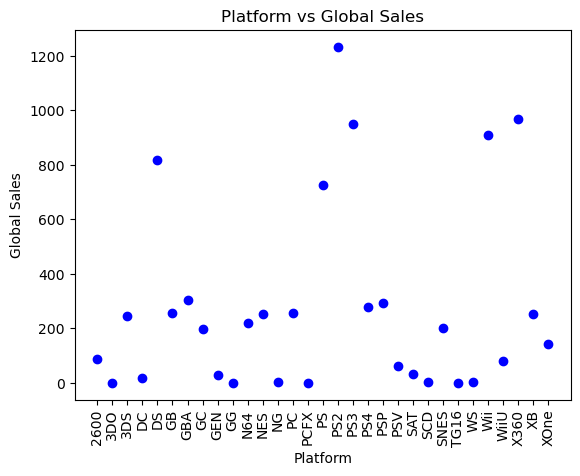

In [6]:

# Group the data by platform and calculate total global sales
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()


plt.scatter(platform_sales['Platform'], platform_sales['Global_Sales'], color='blue')
plt.title('Platform vs Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=90)
plt.show()


## Bar graph - Genre vs Global Sales

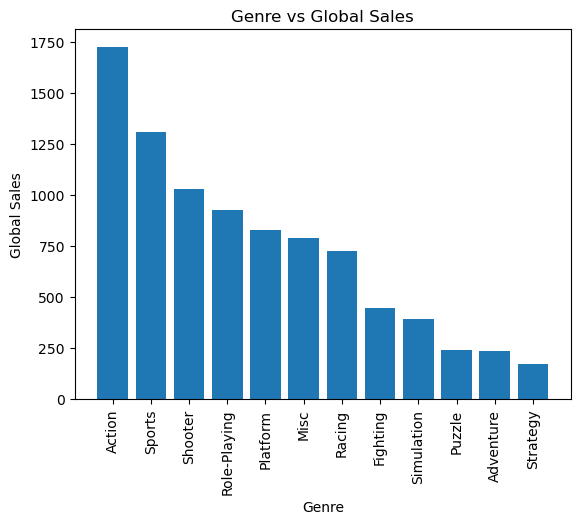

In [7]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

sorted_genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

plt.bar(sorted_genre_sales['Genre'], sorted_genre_sales['Global_Sales'])
plt.title('Genre vs Global Sales')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.xticks(rotation = 90)
plt.show()

## Histogram - Publisher vs Global Sales

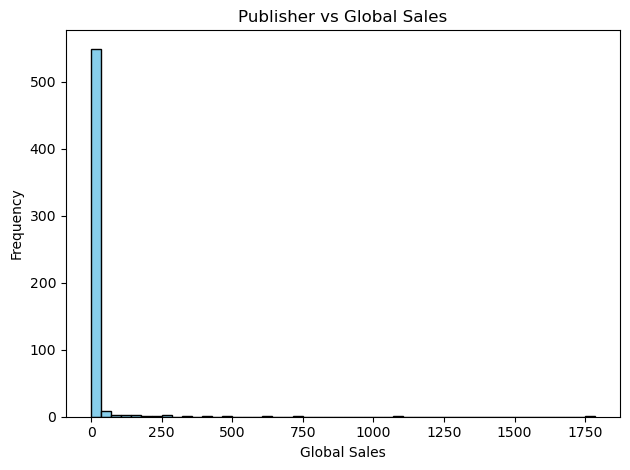

In [8]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum() 

plt.hist(publisher_sales, bins=50, color= 'skyblue', edgecolor = 'black')
plt.title('Publisher vs Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()


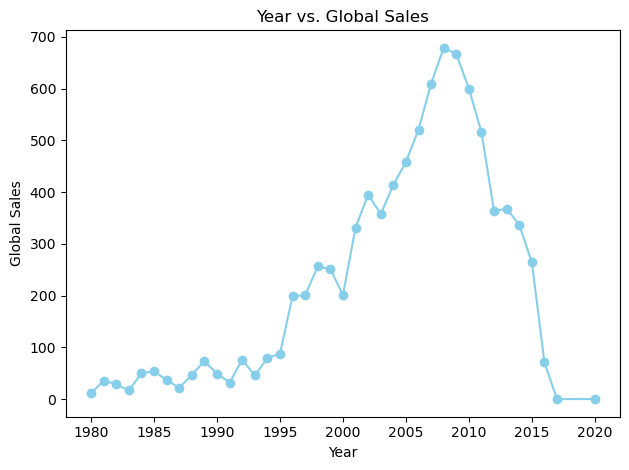

In [9]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='skyblue', linestyle='-')
plt.title('Year vs. Global Sales')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.tight_layout()
plt.show()


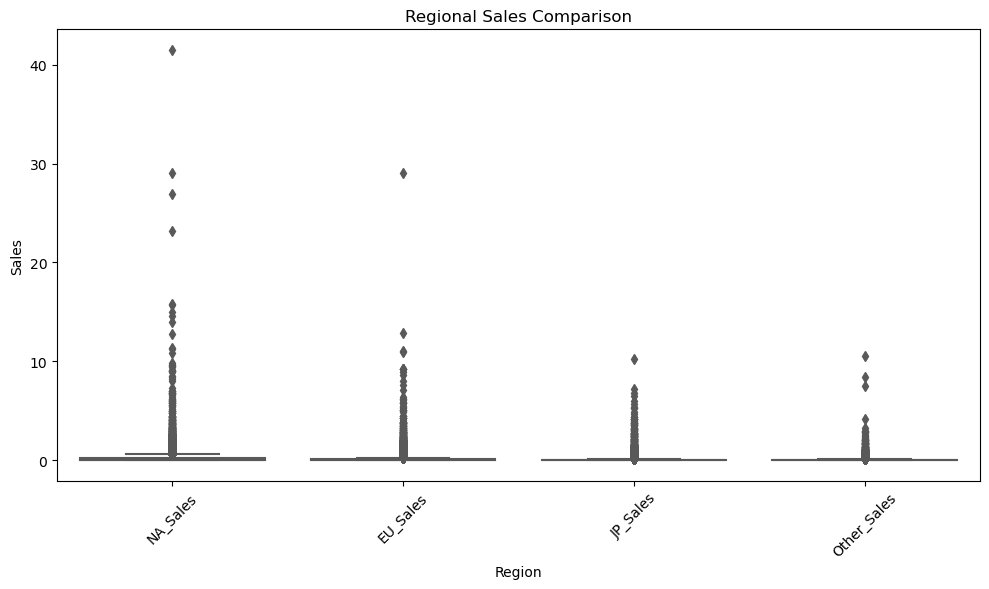

In [10]:
regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=regional_sales, orient='v', palette='Set2')
plt.title('Regional Sales Comparison')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X= df [['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
y= df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=46)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.7205096141254305e-05
